# Exercise 1

Links:
- https://simbad.u-strasbg.fr/simbad/
- http://archive.eso.org/cms.html
- https://archive.stsci.edu
- http://aladin.cds.unistra.fr/AladinLite/

In [22]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [23]:
# data downloa from: https://mast.stsci.edu/search/ui/#/hst

fits_path = "/home/olli/Documents/astronomy/Astrophysik_2_2023_Astro- und Teilchenphysik B/Homework/MAST_2023-10-07T13_55_00.050Z/HST/JDXD06010/jdxd06010_asn.fits"

hdu_list = fits.open(fits_path, cache=True)

In [24]:
# FITS info
# https://www.stsci.edu/instruments/wfpc2/Wfpc2_dhb/intro_ch23.html
# https://hst-docs.stsci.edu/acsdhb/chapter-2-acs-data-structure/2-1-types-of-acs-files
# Generally, the image information is located in the PRIMARY block. The blocks are numbered and can be accessed by indexing hdu_list.

hdu_list.info()

image_data = hdu_list[1].data
print(type(image_data))
print(image_data.shape)


Filename: /home/olli/Documents/astronomy/Astrophysik_2_2023_Astro- und Teilchenphysik B/Homework/MAST_2023-10-07T13_55_00.050Z/HST/JDXD06010/jdxd06010_asn.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  ASN           1 BinTableHDU     25   11R x 3C   [14A, 14A, L]   
<class 'astropy.io.fits.fitsrec.FITS_rec'>
(11,)


In [25]:
# directly to image data:

image_data = fits.getdata(fits_path)


print(type(image_data))
print(image_data.shape)


<class 'astropy.io.fits.fitsrec.FITS_rec'>
(11,)


TypeError: Image data of dtype (numpy.record, [('MEMNAME', 'S14'), ('MEMTYPE', 'S14'), ('MEMPRSNT', 'i1')]) cannot be converted to float

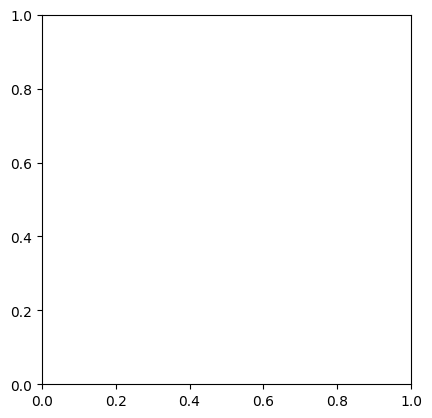

In [30]:
# plot

plt.imshow(image_data, cmap="gray", norm=None)
plt.colorbar()


[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

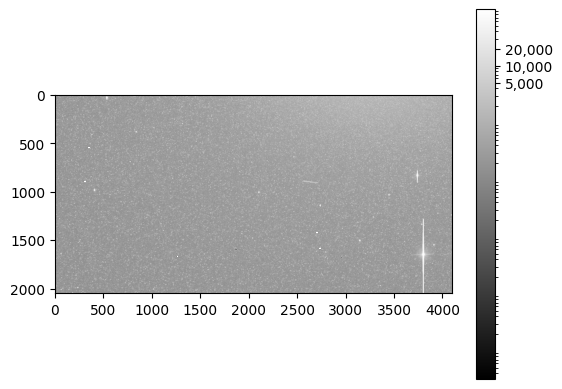

In [ ]:
# Plot log
from matplotlib.colors import LogNorm

plt.imshow(image_data, cmap="gray", norm=LogNorm())

# I chose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.0e3, 1.0e4, 2.0e4])
cbar.ax.set_yticklabels(["5,000", "10,000", "20,000"])

In [ ]:
# Let's get some basic statistics about our image:

print("Min:", np.min(image_data))
print("Max:", np.max(image_data))
print("Mean:", np.mean(image_data))
print("Stdev:", np.std(image_data))

Min: -25487.854
Max: 97309.734
Mean: 453.3496
Stdev: 1931.6953


<class 'numpy.ndarray'>
(8388608,)


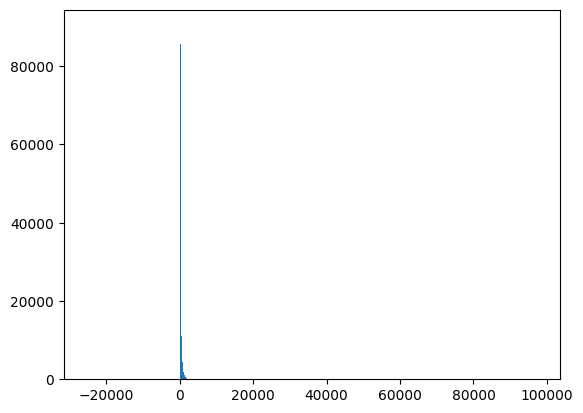

In [ ]:
# plot histogram --> make 2D nd-array 1d first

print(type(image_data.flatten()))
print(image_data.flatten().shape)

histogram = plt.hist(image_data.flatten(), bins="auto")
